# Main goal of this notebook is preparing visualization of given dataset

We want to check if we can divide poisonous and edible mushrooms easily.

### Imports and basic data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Dataframe consists of categorical features.

We need to transform features into numeric type to perform PCA.
First let's try to find any missing values in columns.

In [3]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Now, let's check if there are any features with only one value.

In [4]:
classes_with_max_1_value = [i for i in df.columns if df[i].value_counts().shape[0] < 2]
classes_with_max_1_value

['veil-type']

Histogram for confirmation.

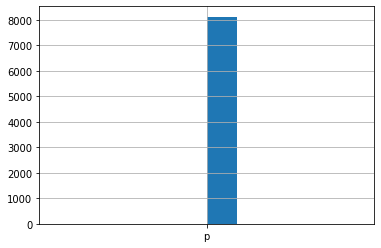

In [5]:
df['veil-type'].hist()

We can drop `veil-type` column - this is a redundant feature.

In [6]:
print('Before: ', df.shape)

df = df.drop(columns=classes_with_max_1_value)

print('After: ' , df.shape)

Before:  (8124, 23)
After:  (8124, 22)


### Transforming dataset

We want to vizualize our data using 2 principal components and label this data with `df['class']` values to see if poisonous and edible mushrooms can be easily divided. 

First, we need to split dataset to X and y and transform X into numerical values. To avoid wrong interpretation of features with multiple categorical values, we will transform features (X) into dummy data.

In [7]:
y = df.iloc[:,0] # class column
X = df.iloc[:,1:] 
X_dummies = pd.get_dummies(X)
X_dummies

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


### PCA with 2 PC

In [8]:
from sklearn.decomposition import PCA

In [9]:
model = PCA(n_components=2).fit(X_dummies.values)
pca_components = model.transform(X_dummies.values)
pca_df = pd.DataFrame(data = pca_components, columns=['pc_1', 'pc_2'])

In [10]:
model.explained_variance_ratio_.sum()

0.3070063415072739

In [11]:
pca_df['class'] = y
pca_df.head()

,pc_1,pc_2,class
0,-0.996245,-0.946892,p
1,-1.441733,-0.164154,e
2,-1.524085,-0.408746,e
3,-1.151800,-0.675820,p
4,-0.617503,-0.996143,e


### Scatter plot for PCA results

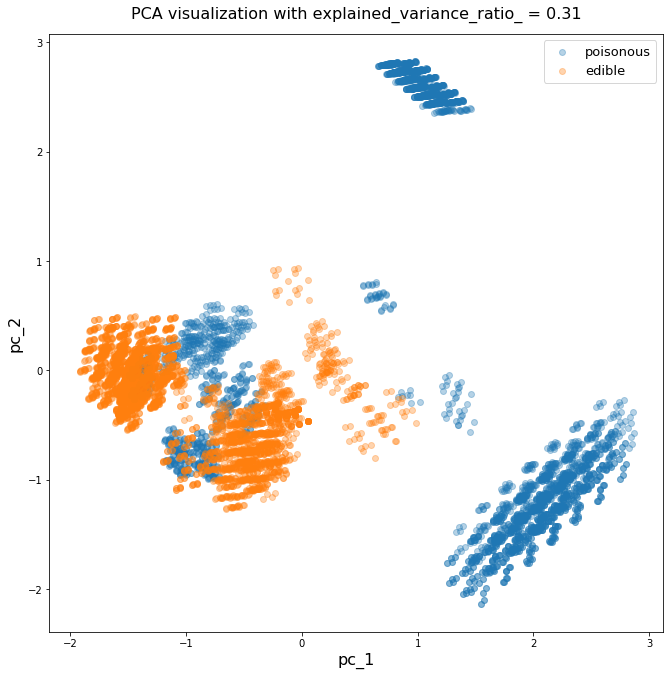

In [13]:
classes = pca_df['class'].unique()
labels = {'e': 'edible', 'p': 'poisonous'}

fig = plt.figure(figsize=(11,11))
for i in classes:
    temp = pca_df[pca_df['class'] == i]
    plt.scatter(temp['pc_1'], temp['pc_2'], alpha=0.33, label = labels[i])
    plt.legend(prop={'size': 13})
    plt.xlabel('pc_1', fontdict= {'fontsize': 16})
    plt.ylabel('pc_2', fontdict= {'fontsize': 16})
    plt.title('PCA visualization with explained_variance_ratio_ = ' + str(round(model.explained_variance_ratio_.sum(), 2)), fontdict= {'fontsize': 16}, pad = 15)
plt.show()

### Comments:

- Although 116 columns were created when the features were changed to 'dummy data', variance_ratio was obtained at 0.31a and the visualization allows to divide the data into two main clusters. 
- When in the future we use more features in the classification models (from 5 to 7), there should be no major problem with obtaining a well-functioning model with high precision and recall.